IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
import matplotlib.pyplot as mlt

In [2]:
import nltk
import re
from nltk. corpus import stopwords
import string
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

###

LOADING THE DATA FROM THE DATASET

In [3]:
data = pd. read_csv("twitter_data.csv")
print(data. head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


###

PREPROCESSING THE DATA

In [4]:
data["labels"] = data["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]
print(data. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


<Axes: xlabel='labels'>

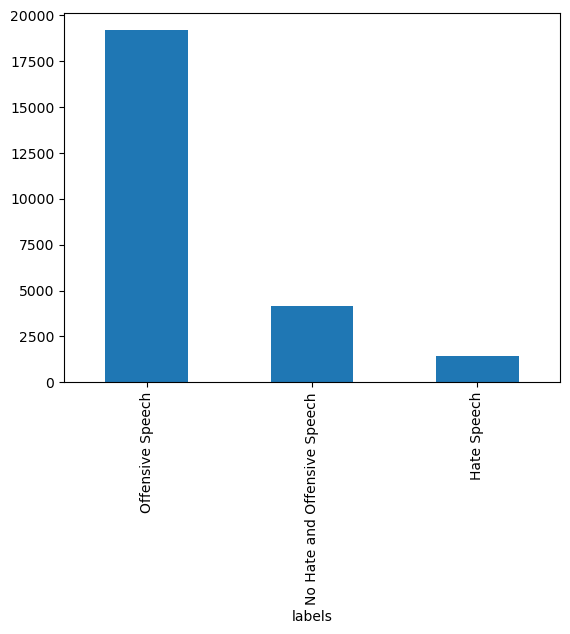

In [5]:
data.labels.value_counts().plot(kind="bar")

###

In [6]:
def clean (text):
 text = str (text). lower()
 text = re. sub('[.?]', '', text) 
 text = re. sub('https?://\S+|www.\S+', '', text)
 text = re. sub('<.?>+', '', text)
 text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
 text = re. sub('\n', '', text)
 text = re. sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ". join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ". join(text)
 return text
data["tweet"] = data["tweet"]. apply(clean)
print(data. head())

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\bhara\AppData\Local\Temp\ipykernel_26244\3123022611.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re. sub('https?://\S+|www.\S+', '', text)
C:\Users\bhara\AppData\Local\Temp\ipykernel_26244\3123022611.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re. sub('\w\d\w', '', text)


                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt mlee boy dat coldtyga dwn bad cuffin dat h...   
2   rt urkindofbrand dawg rt babif ever fuck bitc...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


###

SPLITTING THE DATA

In [7]:
x = np. array(data["tweet"])
y = np. array(data["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=60)

###

BUILDING THE MODEL

In [8]:
model = DecisionTreeClassifier()
model. fit(X_train,y_train)

DecisionTreeClassifier()

###

EVALUATING THE RESULT

In [9]:
y_pred = model. predict (X_test)
y_pred

array(['Offensive Speech', 'Offensive Speech', 'Offensive Speech', ...,
       'Offensive Speech', 'Offensive Speech', 'Offensive Speech'],
      dtype=object)

###

CALCULATING THE ACCURACY

In [10]:
from sklearn. metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.8878353843050232


TESTING THE MODEL USING VARIOUS INPUTS

In [11]:
inp = "shut up"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']
